In [1]:
import numpy as np
import pandas as pd
from category_encoders import BinaryEncoder
import csv

In [2]:
raw = pd.read_csv('WHI_Inflation.csv')

In [3]:
df = raw.copy()
df

,Country,Year,Headline Consumer Price Inflation,Energy Consumer Price Inflation,Food Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation,GDP deflator Index growth rate,Continent/Region,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2015,-0.660000,-4.250000,-0.840000,0.219999,NaN,2.665090,South Asia,3.5750,0.319820,0.302850,0.303350,0.234140,0.365100,0.097190
1,Afghanistan,2016,4.380000,2.070000,5.670000,5.192760,NaN,-2.409509,South Asia,3.3600,0.382270,0.110370,0.173440,0.164300,0.312680,0.071120
2,Afghanistan,2017,4.976000,4.440000,6.940000,5.423228,NaN,2.404000,South Asia,3.7940,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158
3,Afghanistan,2018,0.630000,1.474185,-1.045952,-0.126033,NaN,2.071208,South Asia,3.6320,0.332000,0.537000,0.255000,0.085000,0.191000,0.036000
4,Afghanistan,2019,2.302000,-2.494359,3.794770,NaN,NaN,6.520928,South Asia,3.2030,0.350000,0.517000,0.361000,0.000000,0.158000,0.025000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,Zimbabwe,2019,255.292007,90.808071,86.124371,NaN,NaN,-4.035235,Sub-Saharan Africa,3.6630,0.366000,1.114000,0.433000,0.361000,0.151000,0.089000
1228,Zimbabwe,2020,557.210000,306.431673,601.020236,NaN,NaN,568.971862,Sub-Saharan Africa,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929
1229,Zimbabwe,2021,98.546000,69.820000,105.800000,NaN,NaN,113.294981,Sub-Saharan Africa,3.1450,0.457000,0.649000,0.243000,0.359000,0.157000,0.075000
1230,Zimbabwe,2022,104.705171,97.246550,149.967034,NaN,NaN,113.018434,Sub-Saharan Africa,2.9950,0.947000,0.690000,0.270000,0.329000,0.106000,0.105000


In [4]:
df.drop('Producer Price Inflation', axis = 1, inplace = True)

In [5]:
df = df.dropna(axis = 0)
df

,Country,Year,Headline Consumer Price Inflation,Energy Consumer Price Inflation,Food Consumer Price Inflation,Official Core Consumer Price Inflation,GDP deflator Index growth rate,Continent/Region,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2015,-0.660000,-4.250000,-0.840000,0.219999,2.665090,South Asia,3.5750,0.319820,0.302850,0.303350,0.234140,0.365100,0.097190
1,Afghanistan,2016,4.380000,2.070000,5.670000,5.192760,-2.409509,South Asia,3.3600,0.382270,0.110370,0.173440,0.164300,0.312680,0.071120
2,Afghanistan,2017,4.976000,4.440000,6.940000,5.423228,2.404000,South Asia,3.7940,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158
3,Afghanistan,2018,0.630000,1.474185,-1.045952,-0.126033,2.071208,South Asia,3.6320,0.332000,0.537000,0.255000,0.085000,0.191000,0.036000
9,Albania,2015,1.910179,-0.520000,4.319489,-0.156957,0.564278,Central and Eastern Europe,4.9590,0.878670,0.804340,0.813250,0.357330,0.142720,0.064130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,Vietnam,2019,2.797000,3.042325,4.072783,2.012190,2.201270,Southeast Asia,5.1750,0.741000,1.346000,0.851000,0.543000,0.147000,0.073000
1210,Vietnam,2020,3.220934,0.634826,9.438491,2.309167,0.449589,Southeast Asia,5.3535,0.718092,1.253075,0.819134,0.650836,0.136489,0.089848
1211,Vietnam,2021,1.834716,1.760000,0.730000,0.808008,2.778273,Southeast Asia,5.4110,0.817000,0.873000,0.616000,0.679000,0.124000,0.091000
1212,Vietnam,2022,3.156507,3.120827,2.413387,2.606595,3.716984,Southeast Asia,5.4850,1.252000,0.932000,0.611000,0.707000,0.143000,0.105000


In [6]:
df['Continent/Region'].unique()

array(['South Asia', 'Central and Eastern Europe',
       'North America and ANZ', 'Western Europe',
       'Latin America and Caribbean', 'Sub-Saharan Africa', 'East Asia',
       'Southeast Asia', 'Middle East and North Africa',
       'Commonwealth of Independent States'], dtype=object)

In [7]:
encoder = BinaryEncoder(cols=["Country"], return_df=True)
df_encoded = encoder.fit_transform(df)

In [8]:
encoder = BinaryEncoder(cols=["Continent/Region"], return_df=True)
data = encoder.fit_transform(df_encoded)

In [9]:
data.columns.values

array(['Country_0', 'Country_1', 'Country_2', 'Country_3', 'Country_4',
       'Country_5', 'Country_6', 'Year',
       'Headline Consumer Price Inflation',
       'Energy Consumer Price Inflation', 'Food Consumer Price Inflation',
       'Official Core Consumer Price Inflation',
       'GDP deflator Index growth rate', 'Continent/Region_0',
       'Continent/Region_1', 'Continent/Region_2', 'Continent/Region_3',
       'Score', 'GDP per Capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption'], dtype=object)

In [10]:
reordered = ['Country_0', 'Country_1', 'Country_2', 'Country_3', 'Country_4',
       'Country_5', 'Country_6', 'Year',
       'Headline Consumer Price Inflation',
       'Energy Consumer Price Inflation', 'Food Consumer Price Inflation',
       'Official Core Consumer Price Inflation',
       'GDP deflator Index growth rate', 'Continent/Region_0',
       'Continent/Region_1', 'Continent/Region_2', 'Continent/Region_3', 
       'GDP per Capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption',
       'Score']

data = data[reordered]

In [11]:
data

,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Year,Headline Consumer Price Inflation,Energy Consumer Price Inflation,...,Continent/Region_1,Continent/Region_2,Continent/Region_3,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Score
0,0,0,0,0,0,0,1,2015,-0.660000,-4.250000,...,0,0,1,0.319820,0.302850,0.303350,0.234140,0.365100,0.097190,3.5750
1,0,0,0,0,0,0,1,2016,4.380000,2.070000,...,0,0,1,0.382270,0.110370,0.173440,0.164300,0.312680,0.071120,3.3600
2,0,0,0,0,0,0,1,2017,4.976000,4.440000,...,0,0,1,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,3.7940
3,0,0,0,0,0,0,1,2018,0.630000,1.474185,...,0,0,1,0.332000,0.537000,0.255000,0.085000,0.191000,0.036000,3.6320
9,0,0,0,0,0,1,0,2015,1.910179,-0.520000,...,0,1,0,0.878670,0.804340,0.813250,0.357330,0.142720,0.064130,4.9590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,1,0,1,0,1,1,0,2019,2.797000,3.042325,...,0,0,0,0.741000,1.346000,0.851000,0.543000,0.147000,0.073000,5.1750
1210,1,0,1,0,1,1,0,2020,3.220934,0.634826,...,0,0,0,0.718092,1.253075,0.819134,0.650836,0.136489,0.089848,5.3535
1211,1,0,1,0,1,1,0,2021,1.834716,1.760000,...,0,0,0,0.817000,0.873000,0.616000,0.679000,0.124000,0.091000,5.4110
1212,1,0,1,0,1,1,0,2022,3.156507,3.120827,...,0,0,0,1.252000,0.932000,0.611000,0.707000,0.143000,0.105000,5.4850


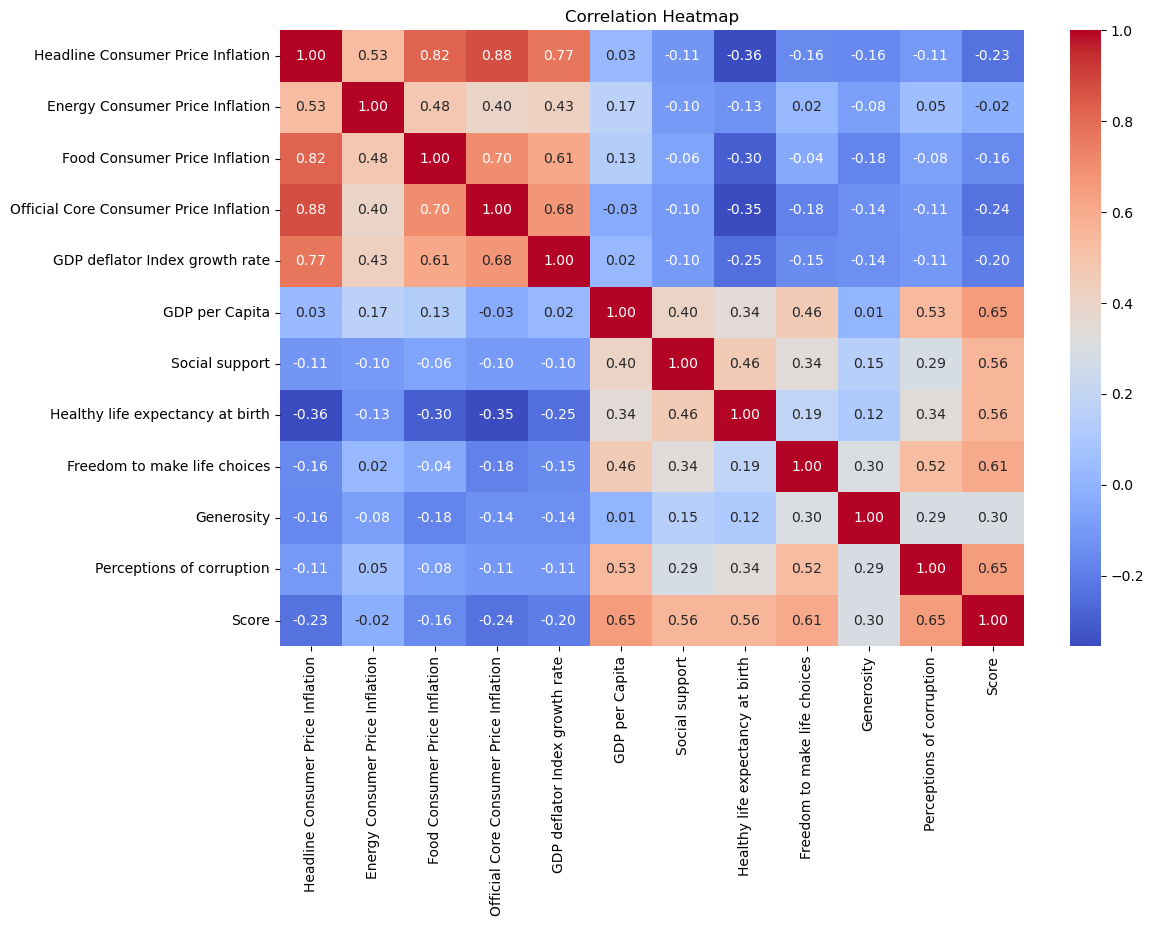

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_cols = ['Headline Consumer Price Inflation', 'Energy Consumer Price Inflation',
                'Food Consumer Price Inflation', 'Official Core Consumer Price Inflation',
                'GDP deflator Index growth rate', 'GDP per Capita', 'Social support',
                'Healthy life expectancy at birth', 'Freedom to make life choices',
                'Generosity', 'Perceptions of corruption', 'Score']

plt.figure(figsize=(12,8))
sns.heatmap(data[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [13]:
data = data.drop('Year', axis = 1)
data.to_csv('data_prepped.csv', index = False)